# CEIA -NLP - Desafío 1 - Vectorización


16Co2024 - Myrna Lorena Degano - a1618

## Exploración preliminar

Librerías y módulos necesarios:

In [150]:
# Descomentar estas líneas en caso de necesitar instalar alguna de las siguientes librerías en el entorno de ejecución

# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install scikit-learn
!pip install optuna

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import optuna
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline


### Conjunto de datos

**20 Newsgroups**: Conjunto de datos que se utiliza comúnmente para tareas de clasificación de texto y contiene publicaciones de 20 grupos de noticias diferentes.

In [152]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

Clase *sklearn.utils._bunch*.  

Bunch es una clase utilizada en scikit-learn para almacenar conjuntos de datos y sus metadatos de manera similar a un diccionario.   
Esta clase permite acceder a los datos de forma más intuitiva, usando atributos en lugar de claves de diccionario.

In [153]:
print(type(newsgroups))

<class 'sklearn.utils._bunch.Bunch'>


Atributos del bunch:

In [154]:
print(dir(newsgroups))

['DESCR', 'data', 'filenames', 'target', 'target_names']


Descripción detallada del dataset:

In [155]:
print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

=================   ==========
Classes                     20
Samples total            18846
Dimensionality               1

Nombres de archivo correspondientes a cada documento en el conjunto de datos.

In [156]:
print(newsgroups.filenames)

['/root/scikit_learn_data/20news_home/20news-bydate-test/rec.sport.hockey/54367'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60215'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/talk.politics.mideast/76120'
 ...
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.sys.ibm.pc.hardware/60695'
 '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38319'
 '/root/scikit_learn_data/20news_home/20news-bydate-test/rec.autos/103195']


Ejemplo de documento (cadena de texto que representa el contenido del artículo en cuestión):

In [157]:
print(newsgroups.data[0])



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




Etiquetas posibles y su descripción:

In [158]:
targets = newsgroups.target
target_names = newsgroups.target_names

unique_combinations = set()

for i in range(len(targets)):
    unique_combinations.add((targets[i], target_names[targets[i]]))

sorted_combinations = sorted(unique_combinations, key=lambda x: x[0])

for target, name in sorted_combinations:
    print(f"Etiqueta: {target} = {name}")

Etiqueta: 0 = alt.atheism
Etiqueta: 1 = comp.graphics
Etiqueta: 2 = comp.os.ms-windows.misc
Etiqueta: 3 = comp.sys.ibm.pc.hardware
Etiqueta: 4 = comp.sys.mac.hardware
Etiqueta: 5 = comp.windows.x
Etiqueta: 6 = misc.forsale
Etiqueta: 7 = rec.autos
Etiqueta: 8 = rec.motorcycles
Etiqueta: 9 = rec.sport.baseball
Etiqueta: 10 = rec.sport.hockey
Etiqueta: 11 = sci.crypt
Etiqueta: 12 = sci.electronics
Etiqueta: 13 = sci.med
Etiqueta: 14 = sci.space
Etiqueta: 15 = soc.religion.christian
Etiqueta: 16 = talk.politics.guns
Etiqueta: 17 = talk.politics.mideast
Etiqueta: 18 = talk.politics.misc
Etiqueta: 19 = talk.religion.misc


### Distribución de los datos

División del set de datos manteniendo la distribución original de las clases.

In [159]:
# Total de muestras
len(newsgroups.data)

18846

In [160]:
X_train, X_val_test, y_train, y_val_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, stratify=newsgroups.target, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test, random_state=42)

# Dimensiones de
total_samples = len(newsgroups.data)
train_samples = len(X_train)
val_samples = len(X_val)
test_samples = len(X_test)
print(f'Entrenamiento: {train_samples} ({round((train_samples/total_samples)*100, 2)}%)')
print(f'Validación: {val_samples} ({round((val_samples/total_samples)*100, 2)}%)')
print(f'Prueba: {test_samples} ({round((test_samples/total_samples)*100, 2)}%)')

Entrenamiento: 13192 (70.0%)
Validación: 2827 (15.0%)
Prueba: 2827 (15.0%)


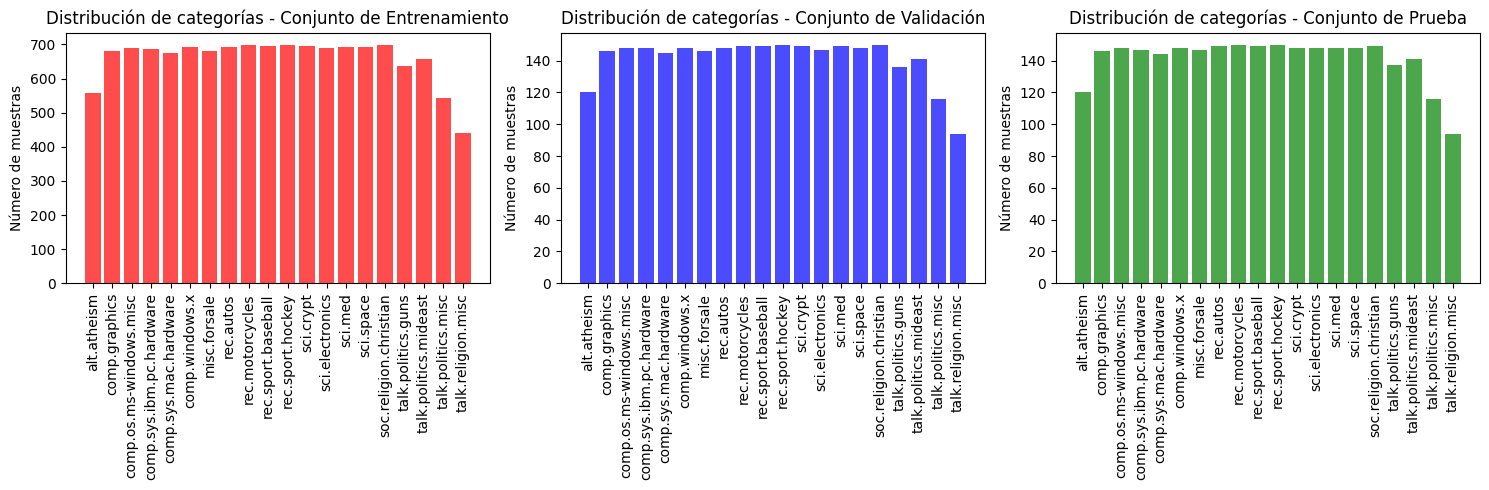

In [161]:
# Contar la frecuencia de cada categoría
train_counts = np.bincount(y_train, minlength=len(newsgroups.target_names))
val_counts = np.bincount(y_val, minlength=len(newsgroups.target_names))
test_counts = np.bincount(y_test, minlength=len(newsgroups.target_names))

# Gráficos de barras para comparar distribuciones
categories = newsgroups.target_names
x = np.arange(len(categories))
colors = ['r', 'b', 'g']
counts = [train_counts, val_counts, test_counts]

plt.figure(figsize=(15, 5))
i=0
for phase in ['Entrenamiento', 'Validación', 'Prueba']:
  # Gráfico de barras para el conjunto de entrenamiento
  plt.subplot(1, 3, i+1)
  plt.bar(x, counts[i], color=colors[i], alpha=0.7)
  plt.xticks(x, categories, rotation=90)
  plt.title(f'Distribución de categorías - Conjunto de {phase}')
  plt.ylabel('Número de muestras')
  i += 1

plt.tight_layout()
plt.show()


### Vectorización

Exploración del uso de *CountVectorizer* y *TfidfVectorizer* y sus opciones de parametrización disponibles.

In [162]:
# Nro. de muestras ejemplo
n=5

#### [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Convierte una colección de documentos de texto en una matriz de recuento de términos. Cada columna representa una palabra y cada fila representa un documento, con el recuento de palabras correspondiente.

In [163]:
X_train_CV = X_train.copy()

# Instancia del vectorizador
countvect = CountVectorizer()

# Matriz documento-término
X_train_CV_vect = countvect.fit_transform(X_train_CV)

print(type(X_train_CV_vect))
print(f'Shape: {X_train_CV_vect.shape}')
print(f'Cantidad de documentos: {X_train_CV_vect.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_train_CV_vect.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
Shape: (13192, 118681)
Cantidad de documentos: 13192
Tamaño del vocabulario (dimensionalidad de los vectores): 118681


In [164]:
print("Vocabulario - Ejs.:\n")

for word, index in list(countvect.vocabulary_.items())[:n]:
  print(f'{word} -> {index}')


Vocabulario - Ejs.:

well -> 112006
then -> 103130
given -> 51114
your -> 116849
definition -> 38623


In [165]:
# Diccionario opuesto que va de índices a términos
print("Vocabulario - Ejs.:\n")
idx2word_TF = {v: k for k,v in countvect.vocabulary_.items()}

for index, word in list(idx2word_TF.items())[:n]:
  print(f'{index} -> {word}')

Vocabulario - Ejs.:

112006 -> well
103130 -> then
51114 -> given
116849 -> your
38623 -> definition


**Parámetros**  
<br>
* **input** (Default = 'content')
 - Si es '*filename*', se espera que la secuencia pasada como argumento a fit sea
una lista de nombres de archivos que deben leerse para obtener el contenido crudo a analizar.  
 - Si es '*file*', los elementos de la secuencia deben tener un método read (objeto similar a un archivo) que se llama para obtener los bytes en memoria.  
 - Si es '*content*', se espera que la entrada sea una secuencia de elementos que pueden ser de tipo cadena o bytes.   
<br>
* **encoding** (Default = 'utf-8')  
 Si se analizan bytes o archivos, esta codificación se usa para decodificar.  
<br>
* **decode_error** (Default =  'strict')  
 Instrucción sobre qué hacer si se proporciona una secuencia de bytes que contiene caracteres no de la codificación dada.
 - '*strict*'  
   Genera un error si hay bytes no válidos.
 - '*ignore*'   
 Cuando se encuentra un carácter que no se puede decodificar con la codificación especificada, se omite completamente ese carácter.   
 Los caracteres problemáticos se ignorarán en el resultado final.   
 Esto significa que no aparecerán en la salida, pero no se generará un error.
 - '*replace*'  
 Cuando se encuentra un carácter que no se puede decodificar, se reemplaza por un carácter de reemplazo, normalmente un signo de interrogación (?).  
 Los caracteres problemáticos serán visibles en el resultado final, pero se marcarán con el carácter de reemplazo.   
 Esto puede ser útil para indicar que hubo problemas de decodificación.  
<br>
* **strip_accents** (Default = None)  
 Eliminar acentos y realizar otra normalización de caracteres durante la etapa de preprocesamiento.  
 [*Callable* - permite crear función custom]   
 - '*ascii*' es un método rápido que solo funciona con caracteres que tienen un mapeo ASCII directo.   
 - '*unicode*' es un método ligeramente más lento que funciona con cualquier carácter.
 - '*None*' significa que no se realiza ninguna normalización de caracteres.  
<br>
* **lowercase** (Default = True)  
 Convertir todos los caracteres a minúsculas antes de tokenizar.  
<br>
* **preprocessor** (Default = None)  
 [*Callable* - permite crear función custom]   
 Sobrescribir la etapa de preprocesamiento (eliminar acentos y convertir a minúsculas) mientras se preservan los pasos de tokenización y generación de n-gramas. Solo se aplica si el analizador no es callable.  
<br>
* **tokenizer** (Default = None)  
 [*Callable* - permite crear función custom]   
 Sobrescribir la etapa de tokenización de cadenas mientras se preservan los pasos de preprocesamiento y generación de n-gramas. Solo se aplica si el analizador es 'word'.  
<br>
* **stop_words** (Default = None)  
 - Si es 'english', se utiliza una lista de palabras vacías incorporada para el inglés.   
 - Si es una lista, se asume que esa lista contiene palabras vacías, todas las cuales serán eliminadas de los tokens resultantes. Solo se aplica si el analizador es 'word'.  
 - Si es None, no se utilizarán palabras vacías.   
<br>
* **token_pattern** (Default =  r”(?u)\b\w\w+\b”)  
 Expresión regular que denota qué constituye un “token”, solo utilizada si el analizador es 'word'. La expresión regular predeterminada selecciona tokens de 2 o más caracteres alfanuméricos (la puntuación se ignora completamente y siempre se trata como un separador de tokens).  
 Si hay un grupo de captura en token_pattern, el contenido del grupo capturado, no la coincidencia completa, se convierte en el token. Se permite como máximo un grupo de captura.  
<br>
* **ngram_range** (Default = (1, 1))  
 (min_n, max_n)   
 El límite inferior y superior del rango de valores n para diferentes n-gramas de palabras o caracteres que se extraerán. Se utilizarán todos los valores de n tales que min_n <= n <= max_n. Por ejemplo, un ngram_range de (1, 1) significa solo unigramas, (1, 2) significa unigramas y bigramas, y (2, 2) significa solo bigramas. Solo se aplica si el analizador no es callable.  
<br>
* **analyzer** (Default = 'word')  
 [*Callable* - permite crear función custom]   
 Determina si la característica debe estar compuesta de n-gramas de palabras o n-gramas de caracteres.
  - '*word*' analiza el texto en términos de palabras (tokens). Esta opción crea n-gramas de palabras y es la opción más común para la vectorización de texto.  
  - '*char*' analiza el texto en términos de caracteres individuales. Útil cuando se quiere capturar patrones a nivel de carácter, como en el análisis de sentimientos o para trabajar con lenguajes con caracteres especiales.
  - '*char_wb*' crea n-gramas de caracteres solo a partir del texto dentro de los límites de las palabras; los n-gramas en los bordes de las palabras se rellenan con espacio.
  - Si se pasa una función callable, se utiliza para extraer la secuencia de características de la entrada cruda y no procesada.  
<br>
* **max_df** (Default = 1.0)  
 Float en el rango [0.0, 1.0] o int  
 Al construir el vocabulario, ignorar términos que tienen una frecuencia de documento estrictamente mayor que el umbral dado (palabras vacías específicas del corpus). Si es un float, el parámetro representa una proporción de documentos, recuentos absolutos enteros. Este parámetro se ignora si vocabulary no es None.  
<br>
* **min_df** (Default = 1)  
  Float en el rango [0.0, 1.0] o int  
  Al construir el vocabulario, ignorar términos que tienen una frecuencia de documento estrictamente menor que el umbral dado. Este valor también se llama corte en la literatura. Si es un float, el parámetro representa una proporción de documentos, recuentos absolutos enteros. Este parámetro se ignora si vocabulary no es None.  
<br>
* **max_features** (Default = None)  
 Si no es None, construir un vocabulario que solo considere las max_features principales ordenadas por frecuencia de término a través del corpus. De lo contrario, se utilizan todas las características.  
 Este parámetro se ignora si vocabulary no es None.  
<br>
* **vocabulary** (Default = None)  
 Mapping o iterable.  
 Ya sea un mapeo (por ejemplo, un dict) donde las claves son términos y los valores son índices en la matriz de características, o un iterable de términos. Si no se proporciona, se determina un vocabulario a partir de los documentos de entrada. Los índices en el mapeo no deben repetirse y no deben tener ningún hueco entre 0 y el índice más grande.  
<br>
* **binary** (Default = False)  
 Si es *True*, todos los recuentos no cero se establecen en 1.   
 Esto es útil para modelos probabilísticos discretos que modelan eventos binarios en lugar de recuentos enteros.  
<br>
* **dtype** (Default = np.int64)  
 Tipo de la matriz devuelta por fit_transform() o transform().

#### [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

 *Term Frequency-Inverse Document Frequency*  
 Evalúa la importancia de una palabra en un documento en relación con un corpus de documentos.  

* Frecuencia de Término (TF): Mide cuántas veces aparece una palabra en un documento. La idea es que las palabras que aparecen con más frecuencia en un documento son más relevantes.

* Frecuencia Inversa de Documentos (IDF): Mide la importancia de una palabra en el corpus. Si una palabra aparece en muchos documentos, su importancia disminuye.

* TF-IDF: Se calcula multiplicando TF por IDF.


In [166]:
X_train_TF = X_train.copy()

# Instancia del vectorizador
tfidfvect = TfidfVectorizer()

# Matriz documento-término
X_train_TF_vect = tfidfvect.fit_transform(X_train_TF)

print(type(X_train_TF_vect))
print(f'Shape: {X_train_TF_vect.shape}')
print(f'Cantidad de documentos: {X_train_TF_vect.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_train_TF_vect.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
Shape: (13192, 118681)
Cantidad de documentos: 13192
Tamaño del vocabulario (dimensionalidad de los vectores): 118681


In [167]:
print("Vocabulario - Ejs.:\n")

for word, index in list(tfidfvect.vocabulary_.items())[:n]:
  print(f'{word} -> {index}')


Vocabulario - Ejs.:

well -> 112006
then -> 103130
given -> 51114
your -> 116849
definition -> 38623


In [168]:
# Diccionario opuesto que va de índices a términos
print("Vocabulario - Ejs.:\n")
idx2word_TF = {v: k for k,v in tfidfvect.vocabulary_.items()}

for index, word in list(idx2word_TF.items())[:n]:
  print(f'{index} -> {word}')


Vocabulario - Ejs.:

112006 -> well
103130 -> then
51114 -> given
116849 -> your
38623 -> definition


**Parámetros**  
<br>
Mismos parámetros que *CountVectorizer* y adicionalmente:  
<br>
* **norm** (Default = 'l2')  
 Cada fila de salida tendrá una norma unitaria, ya sea:  
 - 'l2': La suma de los cuadrados de los elementos del vector es 1.   
 La similitud del coseno entre dos vectores es su producto punto cuando se aplica la norma l2.  
 - 'l1': La suma de los valores absolutos de los elementos del vector es 1.   
 - None: No se aplica ninguna normalización.  
<br>
* **use_idf** (Default = True)  
 Habilita el reescalado por frecuencia inversa de documentos.   
 Si es False, idf(t) = 1.  
<br>
* **smooth_idf** (Default = True)  
 Suaviza los pesos idf al añadir uno a las frecuencias de documentos, como si se hubiera visto un documento adicional que contiene cada término en la colección exactamente una vez. Previene divisiones por cero.  
<br>
* **sublinear_tf** (Default = False)  
 Aplica una escala de tf sublineal, es decir, reemplaza tf por 1 + log(tf).

### Similaridad de documentos

Ejemplo de cálculo de similitud utilizando distancia coseno.

In [169]:
# Id de documento ejemplo
idx = 4811
print(X_train[idx])

Someone referred to my FAQ essay on homosexuality.  Since it hasn't
been posted for some time (and I've modified it somewhat since the
last time), I'm taking this opportunity to post it.  There is another
entry in the FAQ containing comments by some other contributors.  They
can be retrieved from ftp.rutgers.edu as
pub/soc.religion.christian/others/homosexuality.  It contains far
more detail on the exegetical issues than I give here, though
primarily from a conservative point of view.

----------------------------

This posting summarizes several issues involving homosexuality and
Christians.  This is a frequently asked question, so I do not post the
question each time it occurs.  Rather this is an attempt to summarize
the postings we get when we have a discussion.  It summarizes
arguments for allowing Christian homosexuality, since most people
asking the question already know the arguments against it.  The most
common -- but not the only -- question dealt with herein is "how can a
Chr

In [170]:
# Similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train_TF_vect[idx], X_train_TF_vect)[0]

*sklearn.metrics.pairwise.cosine_similarit*y(X, Y=None, dense_output=True)   
<br>
* **X**  
{array-like, sparse matrix} of shape (n_samples_X, n_features)  
Input data.  
<br>
* **Y**  
{array-like, sparse matrix} of shape (n_samples_Y, n_features)   
default=None  
Input data.  
Si es None, la salida será la similitud entre todos los pares de muestras en X.
<br>
* **dense_output**   
default=True

In [171]:
# Ordenar valores de similaridad de mayor a menor
np.sort(cossim)[::-1]

array([1.        , 0.69690799, 0.6325914 , ..., 0.        , 0.        ,
       0.        ])

In [172]:
# Documentos a los que corresponden los índices más cercanos
np.argsort(cossim)[::-1]

array([ 4811,   615, 12309, ...,  9002,  1314,  6595])

In [173]:
# Los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [174]:
# Clase a la que pertenece el documento original:
newsgroups.target_names[y_train[idx]]

'soc.religion.christian'

In [175]:
# Los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups.target_names[y_train[i]])

soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian


### Modelo de clasificación Naïve Bayes

#### [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

Es un clasificador de Naive Bayes que se utiliza principalmente para tareas de clasificación de texto. Se basa en la suposición de que las características siguen una distribución multinomial.

- *Modelo de Naive Bayes*  
 Es un tipo de clasificador probabilístico basado en el teorema de Bayes, que asume que las características son independientes entre sí dado el valor de la clase. Esta suposición simplifica los cálculos.  

- *Distribución Multinomial*  
 MultinomialNB es particularmente adecuado para datos donde las características representan recuentos, como el número de veces que aparece una palabra en un documento. Esto lo hace ideal para problemas de clasificación de texto.

In [176]:
clf = MultinomialNB()
clf.fit(X_train_TF_vect, y_train)

MultinomialNB()

In [177]:
# Con el vectorizador ya fiteado en train,
# vectorizar los textos del conjunto de test
X_test_vect = tfidfvect.transform(X_test)
y_pred =  clf.predict(X_test_vect)

In [178]:
# F1-score: métrica adecuada para reportar desempeño de modelos de cladificación
# Es robusta al desbalance de clases.
# El promediado 'macro' es el promedio de los F1-score de cada clase.
# El promedio 'micro' es equivalente a la accuracy que no es una buena métrica cuando los datasets son desbalanceados
f1_score(y_test, y_pred, average='macro')

0.6372467461984628

#### [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html)

Es una variante del clasificador Naive Bayes que está diseñado para mejorar el rendimiento en tareas de clasificación de texto, especialmente en situaciones de desequilibrio en las clases.   
A diferencia del Naive Bayes tradicional, que asume que las características son independientes y calcula la probabilidad de una clase dada las características, ComplementNB se enfoca en la complementación de las clases.

La idea principal detrás de ComplementNB es calcular la probabilidad de pertenencia a una clase comparando con las clases complementarias. En lugar de simplemente usar las características para predecir una clase, se evalúa cómo se distribuyen las características en todas las clases y se ajusta el modelo para dar más peso a aquellas características que son más útiles para distinguir una clase de sus complementos.


In [179]:
clf2 = ComplementNB()
clf2.fit(X_train_TF_vect, y_train)

ComplementNB()

In [180]:
X_test_vect = tfidfvect.transform(X_test)
y_pred =  clf2.predict(X_test_vect)

In [181]:
f1_score(y_test, y_pred, average='macro')

0.7386991164114071

## Vectorización de documentos

**Consigna 1)**   
  
Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.


In [182]:
# Establecer semilla para reproducibilidad en el análisis
np.random.seed(42)

# Tomar 5 índices al azar
random_indexes = np.random.choice(len(newsgroups.data), size=5, replace=False)

data = []

for index in random_indexes:
    text_sample = newsgroups.data[index]
    target = newsgroups.target[index]
    target_description = newsgroups.target_names[target]
    data.append([index, text_sample[:50] + ' ...', target, target_description])  # Primeros 50 caracteres

df = pd.DataFrame(data, columns=["Índice", "Muestra del documento", "Target", "Descripción del target"])

display(df.style.hide(axis='index'))

Índice,Muestra del documento,Target,Descripción del target
18265,The runner can leave his base at any time. If ...,9,rec.sport.baseball
423,"Well, it's not an FTP site, but I got an 800 numb ...",12,sci.electronics
7900,"Hi, I was reading through ""The Spaceflight Han ...",14,sci.space
14785,"I was a graduate student in the early 1980s, and w ...",18,talk.politics.misc
5217,FREE-ENERGY TECHNOLOGY by R ...,0,alt.atheism


#### TF-IDF con parámetros por default

In [183]:
# Vectorizar con TF-IDF
TF_IDF = TfidfVectorizer()

# Matriz documento-término
newsgroups_vect = TF_IDF.fit_transform(newsgroups.data)

In [184]:
def getSimilarDocs(indexes, dataset_vect, dataset, n):
  """
  Función para obtener los n documentos similares
  a partir de la distancia coseno
  y mostrar resultados
  """

  results = []

  # Similaridad coseno con el resto de los documentos
  for idx in indexes:

    cos_sim = cosine_similarity(dataset_vect[idx], dataset_vect)[0]

    # Ordenar valores de similaridad de mayor a menor
    np.sort(cos_sim)[::-1]

    # Los n documentos más similares:
    most_sim = np.argsort(cos_sim)[::-1][1:n+1]

    # Clase a la que pertenece el documento original
    original_target = dataset.target_names[dataset.target[idx]]

    most_sim_target = ""
    most_sim_idx = ""
    same_target = 0
    # Clases de los n más similares
    for i in most_sim:
      this_target = dataset.target_names[dataset.target[i]]
      most_sim_target += f"{this_target}<br>"
      most_sim_idx += f"{i}<br>"
      if this_target == original_target:
        same_target += 1

    results.append({
              'Índices similares': most_sim_idx,
              'Targets': most_sim_target,
              'Exactitud (%)': f"{round((same_target/n)*100, 2)}"
          })

  results_df = pd.DataFrame(results)

  return pd.concat([df, results_df], axis=1)



In [185]:
# Resultados con TF-IDF con parámetros por default
results_df_TFIDF = getSimilarDocs(random_indexes, newsgroups_vect,  newsgroups, n=5)

display(results_df_TFIDF.style.hide(axis='index'))

Índice,Muestra del documento,Target,Descripción del target,Índices similares,Targets,Exactitud (%)
18265,The runner can leave his base at any time. If ...,9,rec.sport.baseball,6301347097861731212831,rec.sport.baseballrec.sport.baseballrec.sport.baseballrec.sport.baseballrec.sport.baseball,100.0
423,"Well, it's not an FTP site, but I got an 800 numb ...",12,sci.electronics,79511623360455265721,sci.electronicssci.electronicssci.electronicssci.electronicssci.electronics,100.0
7900,"Hi, I was reading through ""The Spaceflight Han ...",14,sci.space,131429337793912358654,sci.spacesci.spacesci.spacesci.crypttalk.politics.misc,60.0
14785,"I was a graduate student in the early 1980s, and w ...",18,talk.politics.misc,1499965466391332717240,talk.politics.misctalk.politics.misctalk.politics.mideastsoc.religion.christiantalk.politics.misc,60.0
5217,FREE-ENERGY TECHNOLOGY by R ...,0,alt.atheism,18296951235896324821,talk.politics.misctalk.politics.miscsci.cryptsci.spacesci.electronics,0.0


#### Vectorización por conteo

In [186]:
# Vectorizar con CountVectorizer
CV = CountVectorizer()

# Matriz documento-término
newsgroups_vect = CV.fit_transform(newsgroups.data)

In [187]:
# Resultados con vectorización por conteo
results_df_CV = getSimilarDocs(random_indexes, newsgroups_vect,  newsgroups, n=5)

display(results_df_CV.style.hide(axis='index'))

Índice,Muestra del documento,Target,Descripción del target,Índices similares,Targets,Exactitud (%)
18265,The runner can leave his base at any time. If ...,9,rec.sport.baseball,63097861029214785997,rec.sport.baseballrec.sport.baseballrec.sport.baseballcomp.sys.ibm.pc.hardwaresci.space,60.0
423,"Well, it's not an FTP site, but I got an 800 numb ...",12,sci.electronics,2528566513483125282042,comp.graphicscomp.graphicscomp.sys.mac.hardwaresci.medmisc.forsale,0.0
7900,"Hi, I was reading through ""The Spaceflight Han ...",14,sci.space,2835135012123584202,alt.atheismsci.crypttalk.religion.miscsci.cryptsci.med,0.0
14785,"I was a graduate student in the early 1980s, and w ...",18,talk.politics.misc,13327184671913157882835,soc.religion.christianalt.atheismtalk.politics.misctalk.politics.miscalt.atheism,40.0
5217,FREE-ENERGY TECHNOLOGY by R ...,0,alt.atheism,168681235813270689710351,sci.spacesci.cryptalt.atheismsci.spacetalk.politics.mideast,20.0


#### TF-IDF con parámetros personalizados

In [188]:
# Vectorizar con TF-IDF ajustando parámetros del vectorizador
TF_IDF_2 = TfidfVectorizer(
    stop_words='english',
    norm='l2'
)

# Matriz documento-término
newsgroups_vect = TF_IDF_2.fit_transform(newsgroups.data)

In [189]:
# Resultados con TF-IDF personalizado
results_df_TFIDF_2 = getSimilarDocs(random_indexes, newsgroups_vect,  newsgroups, n=5)

display(results_df_TFIDF_2.style.hide(axis='index'))

Índice,Muestra del documento,Target,Descripción del target,Índices similares,Targets,Exactitud (%)
18265,The runner can leave his base at any time. If ...,9,rec.sport.baseball,6301347097861447283,rec.sport.baseballrec.sport.baseballrec.sport.baseballrec.sport.baseballrec.sport.baseball,100.0
423,"Well, it's not an FTP site, but I got an 800 numb ...",12,sci.electronics,79511623360455265721,sci.electronicssci.electronicssci.electronicssci.electronicssci.electronics,100.0
7900,"Hi, I was reading through ""The Spaceflight Han ...",14,sci.space,9337131421682820457939,sci.spacesci.spacesci.spacesci.spacesci.space,100.0
14785,"I was a graduate student in the early 1980s, and w ...",18,talk.politics.misc,1499917240131131159112526,talk.politics.misctalk.politics.misctalk.politics.misctalk.politics.misctalk.politics.misc,100.0
5217,FREE-ENERGY TECHNOLOGY by R ...,0,alt.atheism,48219695182963211567,sci.electronicstalk.politics.misctalk.politics.miscsci.spacerec.autos,0.0


#### Conclusiones

Obtuve resultados más precisos ajustando los parámetros del *TfidfVectorizer*.  
Sólo con uno de los documentos seleccionados al azar encontré resultados dispares.


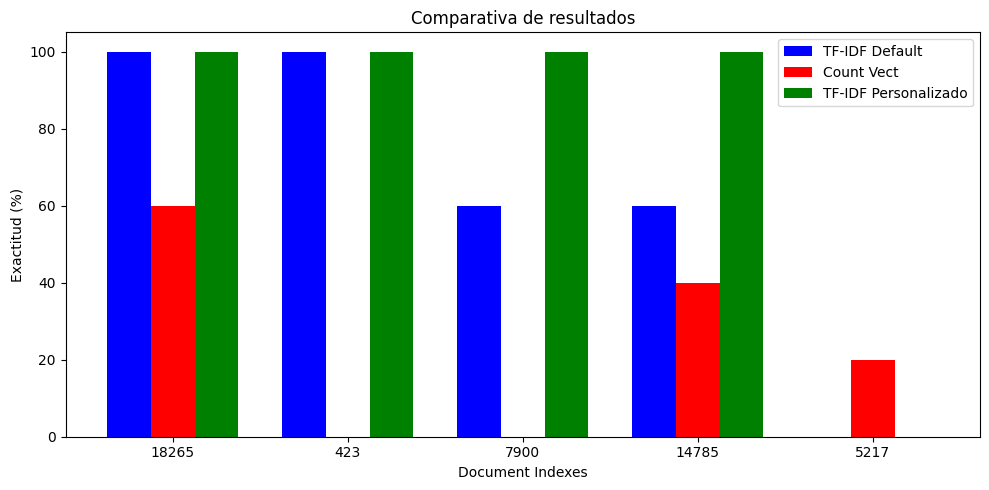

In [190]:
# Gráfico comparativo de resultados
x_labels = random_indexes
series1 = results_df_TFIDF['Exactitud (%)'].to_numpy(dtype=float)
series2 = results_df_CV['Exactitud (%)'].to_numpy(dtype=float)
series3 = results_df_TFIDF_2['Exactitud (%)'].to_numpy(dtype=float)

x = np.arange(len(x_labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 5))

# Agregar las tres series
ax.bar(x - width, series1, width, label='TF-IDF Default', color='b')
ax.bar(x, series2, width, label='Count Vect', color='r')
ax.bar(x + width, series3, width, label='TF-IDF Personalizado', color='g')

# Configuraciones adicionales
ax.set_xlabel('Document Indexes')
ax.set_ylabel('Exactitud (%)')
ax.set_title('Comparativa de resultados')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

plt.tight_layout()
plt.show()


Analizando el texto cuyos documentos similares pertenecen a clases diferentes, se ve que, el documento original tiene ciertas particularidades que hace que, no sea tan fácilmente clasificable.  
Tiene una diversidad de términos que pueden hacerlo aplicable a más de una categoría, por lo que, requeriría de modelos de clasificación más complejos para poder clasificarlo correctamente.

In [191]:
print(newsgroups.data[5217])

FREE-ENERGY TECHNOLOGY
                       by Robert E. McElwaine, Physicist
          
               Ninety to a hundred years ago, everybody "knew" that a 
          heavier-than-air machine could not possibly fly.  It would 
          violate the "laws" of physics.  All of the "experts" and 
          "authorities" said so. 
          
               For example, Simon Newcomb declared in 1901:  "The 
          demonstration that no possible combination of known 
          substances, known forms of machinery and known forms of 
          force, can be united in a practical machine by which man 
          shall fly long distances through the air, seems to the writer 
          as complete as it is possible for the demonstration of any 
          physical fact to be." 
          
               Fortunately, a few SMART people such as the Wright 
          Brothers did NOT accept such pronouncements as the final 
          word.  Now we take airplanes for granted, (except when the

## Clasificación - Modelos Naïve Bayes

**Consigna 2)**   
  
Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación (f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial y ComplementNB.

In [192]:
X_train_2 = X_train.copy()

# Instancias del vectorizador
TF_IDF_1 = TfidfVectorizer()

TF_IDF_2 = TfidfVectorizer(
    stop_words='english',
    norm='l2'
)

# Matriz documento-término
X_train_vect_TF_IDF_1 = TF_IDF_1.fit_transform(X_train_2)
X_train_vect_TF_IDF_2 = TF_IDF_2.fit_transform(X_train_2)

f1_score_results = {}

#### Experimento 1

Vectorización con parámetros por default y MultinomialNB.

In [193]:
clf_1 = MultinomialNB()
clf_1.fit(X_train_vect_TF_IDF_1, y_train)

X_test_vect = TF_IDF_1.transform(X_test)
y_pred =  clf_1.predict(X_test_vect)
y_score = clf_1.predict_proba(X_test_vect)


f1_score_1 = f1_score(y_test, y_pred, average='macro')

print(f1_score_1)

f1_score_results['MultiNB - Vect Default'] = f1_score_1


0.6372467461984628


#### Experimento 2

Vectorización con parámetros personalizados y MultinomialNB.

In [194]:
clf_2 = MultinomialNB()
clf_2.fit(X_train_vect_TF_IDF_2, y_train)

X_test_vect = TF_IDF_2.transform(X_test)
y_pred =  clf_2.predict(X_test_vect)
y_score = clf_2.predict_proba(X_test_vect)[:, 1]

f1_score_2 = f1_score(y_test, y_pred, average='macro')

print(f1_score_2)

f1_score_results['MultiNB - Vect Custom'] = f1_score_2

0.6868309397144982


#### Experimento 3

Vectorización con parámetros por default y ComplementNB.

In [195]:
clf_3 = ComplementNB()
clf_3.fit(X_train_vect_TF_IDF_1, y_train)

X_test_vect = TF_IDF_1.transform(X_test)
y_pred =  clf_3.predict(X_test_vect)
y_score = clf_3.predict_proba(X_test_vect)[:, 1]


f1_score_3 = f1_score(y_test, y_pred, average='macro')

print(f1_score_3)

f1_score_results['CompNB - Vect Default'] = f1_score_3

0.7386991164114071


#### Experimento 4

Vectorización con parámetros personalizados y ComplementNB.

In [196]:
clf_4 = ComplementNB()
clf_4.fit(X_train_vect_TF_IDF_2, y_train)

X_test_vect = TF_IDF_2.transform(X_test)
y_pred =  clf_4.predict(X_test_vect)
y_score = clf_4.predict_proba(X_test_vect)[:, 1]


f1_score_4 = f1_score(y_test, y_pred, average='macro')

print(f1_score_4)

f1_score_results['CompNB - Vect Custom'] = f1_score_4

0.749198941834168


#### Experimento 5

MultinomialNB con ajuste de hiperparámetros.

In [197]:
# Contar el número de instancias de cada clase
class_counts = np.bincount(newsgroups.target)

# Calcular el total de instancias
total_count = len(newsgroups.target)

# Calcular la probabilidad a priori para cada clase
class_prior_array = class_counts / total_count

In [198]:
clf_5 = MultinomialNB()

# Definir los parámetros a ajustar
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0], # Valores más pequeños aplican más suavizado (Ajuste de las probabilidades estimadas para que no sean cero)
    'fit_prior': [True, False],   # Uso de probabilidades a priori
    'class_prior': [None, class_prior_array]  # Probabilidades a priori de cada clase
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clf_5, param_grid, cv=5)

# Ajustar el modelo
grid_search.fit(X_train_vect_TF_IDF_2, y_train)

# Mejor combinación de parámetros
print(grid_search.best_params_)

{'alpha': 0.1, 'class_prior': None, 'fit_prior': False}


In [199]:
clf_5 = MultinomialNB(alpha=0.1)
clf_5.fit(X_train_vect_TF_IDF_2, y_train)

X_test_vect = TF_IDF_2.transform(X_test)
y_pred =  clf_5.predict(X_test_vect)
y_score = clf_5.predict_proba(X_test_vect)[:, 1]


f1_score_5 = f1_score(y_test, y_pred, average='macro')

print(f1_score_5)

f1_score_results['MultiNB Custom - Vect Custom'] = f1_score_5

0.7294921706937044


#### Experimento 6

ComplementNB con ajuste de hiperparámetros.

In [200]:
clf_6 = ComplementNB()

# Definir los parámetros a ajustar
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0], # Suavizado
    'fit_prior': [True, False],   # Uso de probabilidades a priori
    'class_prior': [None, class_prior_array],  # Probabilidades a priori de cada clase
     'norm': [True, False]             # Normalización de los parámetros
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(clf_6, param_grid, cv=5)

# Ajustar el modelo
grid_search.fit(X_train_vect_TF_IDF_2, y_train)

# Mejor combinación de parámetros
print(grid_search.best_params_)

{'alpha': 0.5, 'class_prior': None, 'fit_prior': True, 'norm': False}


In [201]:
clf_6 = ComplementNB(alpha=0.5)
clf_6.fit(X_train_vect_TF_IDF_2, y_train)

X_test_vect = TF_IDF_2.transform(X_test)
y_pred =  clf_6.predict(X_test_vect)
y_score = clf_6.predict_proba(X_test_vect)[:, 1]


f1_score_6 = f1_score(y_test, y_pred, average='macro')

print(f1_score_6)

f1_score_results['CompNB Custom - Vect Custom'] = f1_score_6

0.7531073982716813


#### F1-Score - Comparativa

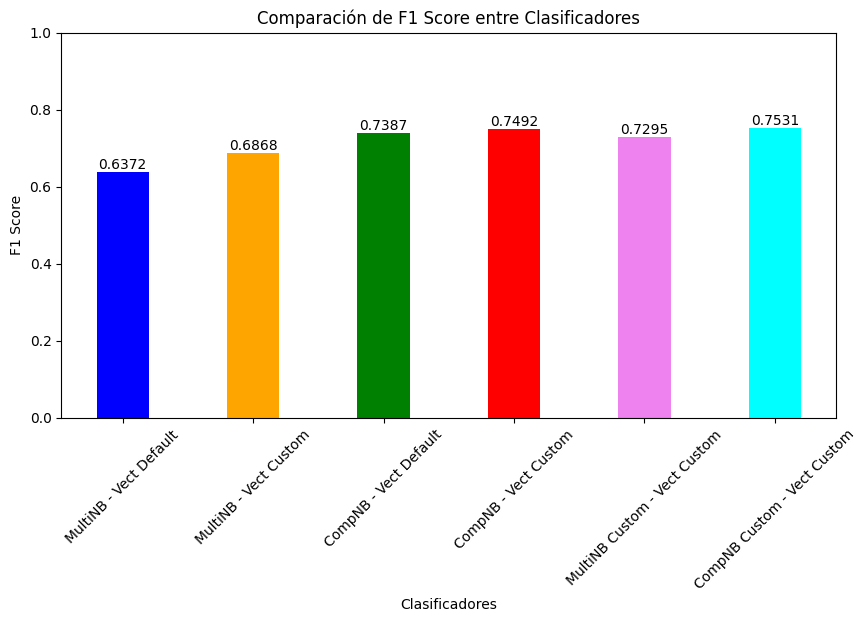

In [202]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(f1_score_results.keys(), f1_score_results.values(), width=0.4, color=['blue', 'orange', 'green', 'red', 'violet', 'cyan'])

plt.xlabel('Clasificadores')
plt.ylabel('F1 Score')
plt.title('Comparación de F1 Score entre Clasificadores')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Agregar el valor en la parte superior de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.4f}',
             ha='center', va='bottom')

plt.show()


#### Conclusiones

Se obtienen mejores resultados con ComplementNB.  Este algoritmo utiliza los complementos de las clases en su entrenamiento, lo que ayuda a capturar patrones más relevantes en los datos.

Además, como ya se había observado en el punto anterior, personalizar los parámetros del vectorizador también hace que se obtengan mejores resultados.

En resumen, el uso de ComplementNB y la personalización del vectorizador permite capturar patrones más relevantes y gestionar mejor la naturaleza de los datos, lo que conduce a mejores resultados en la clasificación.

#### Optimización de hiperparámetros

Utilizo Optuna para encontrar la mejor combinación de hiperparámetros de manera de maximizar la métrica de evaluación.

In [203]:
# Función de optimización
def objective(trial):

    # Imprimir información sobre el trial
    print(f"Optuna Test {trial.number}")

    # Hiperparámetros a optimizar de ComplementNB
    clf = ComplementNB(
        alpha = trial.suggest_float('alpha', 0.01, 1.0),
        )

    # Vectorización TF-IDF
    vectorizer = TfidfVectorizer(
        stop_words = trial.suggest_categorical('stop_words', [None, 'english']),
        norm = trial.suggest_categorical('norm', ['l1', 'l2', None]),
        use_idf = trial.suggest_categorical('use_idf', [True, False]),
        smooth_idf = trial.suggest_categorical('smooth_idf', [True, False])
    )

    model = make_pipeline(vectorizer, clf)

    # Ajustar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Predecir en el conjunto de validación
    y_pred = model.predict(X_val)

    # Calcular el F1 Score en el conjunto de validación
    f1 = f1_score(y_val, y_pred, average='macro')

    return f1



In [204]:
# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)


[I 2024-10-28 20:40:23,505] A new study created in memory with name: no-name-0b6c75e1-7268-4035-9dd9-aba99f58f5fa


Optuna Test 0


[I 2024-10-28 20:40:26,914] Trial 0 finished with value: 0.7392287985299777 and parameters: {'alpha': 0.36314121841918606, 'stop_words': 'english', 'norm': 'l1', 'use_idf': True, 'smooth_idf': True}. Best is trial 0 with value: 0.7392287985299777.


Optuna Test 1


[I 2024-10-28 20:40:30,275] Trial 1 finished with value: 0.7447582727332638 and parameters: {'alpha': 0.22706052277948877, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 2


[I 2024-10-28 20:40:33,540] Trial 2 finished with value: 0.7013348289082616 and parameters: {'alpha': 0.865264280241294, 'stop_words': 'english', 'norm': 'l1', 'use_idf': False, 'smooth_idf': True}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 3


[I 2024-10-28 20:40:38,219] Trial 3 finished with value: 0.7029826578386651 and parameters: {'alpha': 0.9600504855327506, 'stop_words': None, 'norm': 'l1', 'use_idf': True, 'smooth_idf': True}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 4


[I 2024-10-28 20:40:41,467] Trial 4 finished with value: 0.7064821580137631 and parameters: {'alpha': 0.626468083119851, 'stop_words': 'english', 'norm': 'l1', 'use_idf': False, 'smooth_idf': False}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 5


[I 2024-10-28 20:40:44,657] Trial 5 finished with value: 0.6658633899666269 and parameters: {'alpha': 0.12382548103633982, 'stop_words': 'english', 'norm': None, 'use_idf': True, 'smooth_idf': True}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 6


[I 2024-10-28 20:40:48,688] Trial 6 finished with value: 0.6985043603582367 and parameters: {'alpha': 0.18917720684505573, 'stop_words': 'english', 'norm': None, 'use_idf': False, 'smooth_idf': False}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 7


[I 2024-10-28 20:40:52,489] Trial 7 finished with value: 0.74387134867187 and parameters: {'alpha': 0.16658095645569335, 'stop_words': None, 'norm': 'l1', 'use_idf': True, 'smooth_idf': False}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 8


[I 2024-10-28 20:40:57,091] Trial 8 finished with value: 0.6990306821487657 and parameters: {'alpha': 0.8594883379261998, 'stop_words': None, 'norm': None, 'use_idf': False, 'smooth_idf': False}. Best is trial 1 with value: 0.7447582727332638.


Optuna Test 9


[I 2024-10-28 20:41:01,668] Trial 9 finished with value: 0.746446740477916 and parameters: {'alpha': 0.06956958443476707, 'stop_words': 'english', 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 9 with value: 0.746446740477916.


Optuna Test 10


[I 2024-10-28 20:41:05,248] Trial 10 finished with value: 0.7380810316294515 and parameters: {'alpha': 0.5605790375658647, 'stop_words': 'english', 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 9 with value: 0.746446740477916.


Optuna Test 11


[I 2024-10-28 20:41:08,629] Trial 11 finished with value: 0.7512772099985189 and parameters: {'alpha': 0.026039853814606002, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 11 with value: 0.7512772099985189.


Optuna Test 12


[I 2024-10-28 20:41:11,940] Trial 12 finished with value: 0.7516912477948817 and parameters: {'alpha': 0.041297553215543695, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 13


[I 2024-10-28 20:41:16,627] Trial 13 finished with value: 0.7335135589311084 and parameters: {'alpha': 0.385372846042959, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 14


[I 2024-10-28 20:41:20,142] Trial 14 finished with value: 0.7512858741514117 and parameters: {'alpha': 0.03166852212375911, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 15


[I 2024-10-28 20:41:23,506] Trial 15 finished with value: 0.734205495721366 and parameters: {'alpha': 0.3598176581364764, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 16


[I 2024-10-28 20:41:27,501] Trial 16 finished with value: 0.7509015799737279 and parameters: {'alpha': 0.029231979825772924, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 17


[I 2024-10-28 20:41:31,474] Trial 17 finished with value: 0.7383152881203416 and parameters: {'alpha': 0.28569205329105446, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 18


[I 2024-10-28 20:41:34,848] Trial 18 finished with value: 0.741562860948634 and parameters: {'alpha': 0.7048012772972818, 'stop_words': None, 'norm': 'l2', 'use_idf': True, 'smooth_idf': True}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 19


[I 2024-10-28 20:41:38,208] Trial 19 finished with value: 0.7330837896182736 and parameters: {'alpha': 0.4419674103746776, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 20


[I 2024-10-28 20:41:43,518] Trial 20 finished with value: 0.6952879928910483 and parameters: {'alpha': 0.26252581298913313, 'stop_words': None, 'norm': None, 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 21


[I 2024-10-28 20:41:46,968] Trial 21 finished with value: 0.748891367168999 and parameters: {'alpha': 0.01248278453443974, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 22


[I 2024-10-28 20:41:50,466] Trial 22 finished with value: 0.746610233807738 and parameters: {'alpha': 0.11271578857546222, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 23


[I 2024-10-28 20:41:54,787] Trial 23 finished with value: 0.7460516756148718 and parameters: {'alpha': 0.08922752828920297, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 24


[I 2024-10-28 20:41:58,530] Trial 24 finished with value: 0.7509062107686086 and parameters: {'alpha': 0.026965463607508896, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 25


[I 2024-10-28 20:42:01,905] Trial 25 finished with value: 0.7469638010483178 and parameters: {'alpha': 0.16334883399000683, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 26


[I 2024-10-28 20:42:05,323] Trial 26 finished with value: 0.7450584180029536 and parameters: {'alpha': 0.282076769903407, 'stop_words': None, 'norm': 'l2', 'use_idf': True, 'smooth_idf': True}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 27


[I 2024-10-28 20:42:09,960] Trial 27 finished with value: 0.7460220499488667 and parameters: {'alpha': 0.10485307697320337, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 28


[I 2024-10-28 20:42:13,295] Trial 28 finished with value: 0.696276223207198 and parameters: {'alpha': 0.19088303445789456, 'stop_words': None, 'norm': None, 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 29


[I 2024-10-28 20:42:16,662] Trial 29 finished with value: 0.7439819475257393 and parameters: {'alpha': 0.471994608053911, 'stop_words': None, 'norm': 'l2', 'use_idf': True, 'smooth_idf': True}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 30


[I 2024-10-28 20:42:20,746] Trial 30 finished with value: 0.6909367813103209 and parameters: {'alpha': 0.3559515237413885, 'stop_words': None, 'norm': 'l1', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 31


[I 2024-10-28 20:42:24,653] Trial 31 finished with value: 0.751067154794084 and parameters: {'alpha': 0.019366596149745022, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 32


[I 2024-10-28 20:42:27,977] Trial 32 finished with value: 0.7468162180682313 and parameters: {'alpha': 0.06363880751282511, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 33


[I 2024-10-28 20:42:31,279] Trial 33 finished with value: 0.7492758888527152 and parameters: {'alpha': 0.014508074277434155, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 34


[I 2024-10-28 20:42:35,813] Trial 34 finished with value: 0.7412492170006655 and parameters: {'alpha': 0.24964039631336543, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 35


[I 2024-10-28 20:42:39,194] Trial 35 finished with value: 0.7120140026149839 and parameters: {'alpha': 0.1385203405779644, 'stop_words': None, 'norm': 'l1', 'use_idf': False, 'smooth_idf': True}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 36


[I 2024-10-28 20:42:42,545] Trial 36 finished with value: 0.7463238618079984 and parameters: {'alpha': 0.07442175694687511, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 37


[I 2024-10-28 20:42:46,136] Trial 37 finished with value: 0.7460104564567103 and parameters: {'alpha': 0.1822720324313143, 'stop_words': 'english', 'norm': 'l2', 'use_idf': True, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 38


[I 2024-10-28 20:42:50,134] Trial 38 finished with value: 0.7250326409720225 and parameters: {'alpha': 0.22071516416284093, 'stop_words': 'english', 'norm': 'l1', 'use_idf': False, 'smooth_idf': True}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 39


[I 2024-10-28 20:42:53,471] Trial 39 finished with value: 0.6998949915626904 and parameters: {'alpha': 0.7540548113253169, 'stop_words': None, 'norm': None, 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 40


[I 2024-10-28 20:42:56,569] Trial 40 finished with value: 0.7448217817981154 and parameters: {'alpha': 0.13305036684876423, 'stop_words': 'english', 'norm': 'l2', 'use_idf': True, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 41


[I 2024-10-28 20:43:01,029] Trial 41 finished with value: 0.7494342444393285 and parameters: {'alpha': 0.052410213992359476, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 42


[I 2024-10-28 20:43:04,615] Trial 42 finished with value: 0.751067154794084 and parameters: {'alpha': 0.018675710016897724, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 43


[I 2024-10-28 20:43:08,010] Trial 43 finished with value: 0.7461116571495031 and parameters: {'alpha': 0.08216849920731714, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 44


[I 2024-10-28 20:43:11,448] Trial 44 finished with value: 0.7473813303961603 and parameters: {'alpha': 0.12585216939223107, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 45


[I 2024-10-28 20:43:16,070] Trial 45 finished with value: 0.7495002211398674 and parameters: {'alpha': 0.015254131499066476, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 46


[I 2024-10-28 20:43:19,451] Trial 46 finished with value: 0.6999786013748067 and parameters: {'alpha': 0.20761339464122405, 'stop_words': None, 'norm': 'l1', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 47


[I 2024-10-28 20:43:22,864] Trial 47 finished with value: 0.6998076346381653 and parameters: {'alpha': 0.3100842700937791, 'stop_words': 'english', 'norm': None, 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 48


[I 2024-10-28 20:43:27,607] Trial 48 finished with value: 0.7148570796449749 and parameters: {'alpha': 0.9735531524254669, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': True}. Best is trial 12 with value: 0.7516912477948817.


Optuna Test 49


[I 2024-10-28 20:43:30,940] Trial 49 finished with value: 0.7286370068160423 and parameters: {'alpha': 0.5543393501516998, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}. Best is trial 12 with value: 0.7516912477948817.


In [205]:
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", study.best_params)
print("Mejor F1 score:", study.best_value)

Mejores hiperparámetros: {'alpha': 0.041297553215543695, 'stop_words': None, 'norm': 'l2', 'use_idf': False, 'smooth_idf': False}
Mejor F1 score: 0.7516912477948817


In [206]:
# Al final, evalúo el modelo en el conjunto de prueba
best_model = make_pipeline(
    TfidfVectorizer(
        stop_words = study.best_params['stop_words'],
        norm = study.best_params['norm'],
        use_idf = study.best_params['use_idf'],
        smooth_idf = study.best_params['smooth_idf']
        ),
    ComplementNB(
        alpha=study.best_params['alpha']
        )
)

# Ajustar el modelo con el conjunto de entrenamiento completo
best_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

F1 Score en el conjunto de prueba: 0.7517


Para la optimización de hiperparámetros se eliminaron algunos porque en los experimentos iniciales se veía que incluirlos daba un valor más bajo de la métrica (Por ejemplo, max_features, max_df, min_df, ngram_range).  

Se utilizó el conjunto de datos de validación para el ajuste de hiperparámetros y luego la evaluación final sobre el conjunto de pruebas, y arrojó resultados similares a los ya obtenidos en el experimento 6 con GridSearchCV.  


In [207]:
best_model = make_pipeline(
    TfidfVectorizer(
        stop_words = 'english',
        norm = 'l2'
        ),
    ComplementNB(
        alpha=0.5
        )
)

# Ajustar el modelo con el conjunto de entrenamiento completo
best_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f"F1 Score en el conjunto de prueba: {f1_test:.4f}")

F1 Score en el conjunto de prueba: 0.7531


#### Conclusiones finales

<u>Mejor resultado obtenido</u>:  
<br>
<b>F1-Score =  0.7531</b>
<br>
<br>
* Vectorizador *TfidfVectorizer* con sus parámetros por default, excepto:
 - stop_words ='english'
 - norm = 'l2'
<br>
* Clasificador *ComplementNB* con sus parámetros por default, excepto:
 -  alpha = 0.5
<br>
<br>


Matriz de confusión del modelo final:

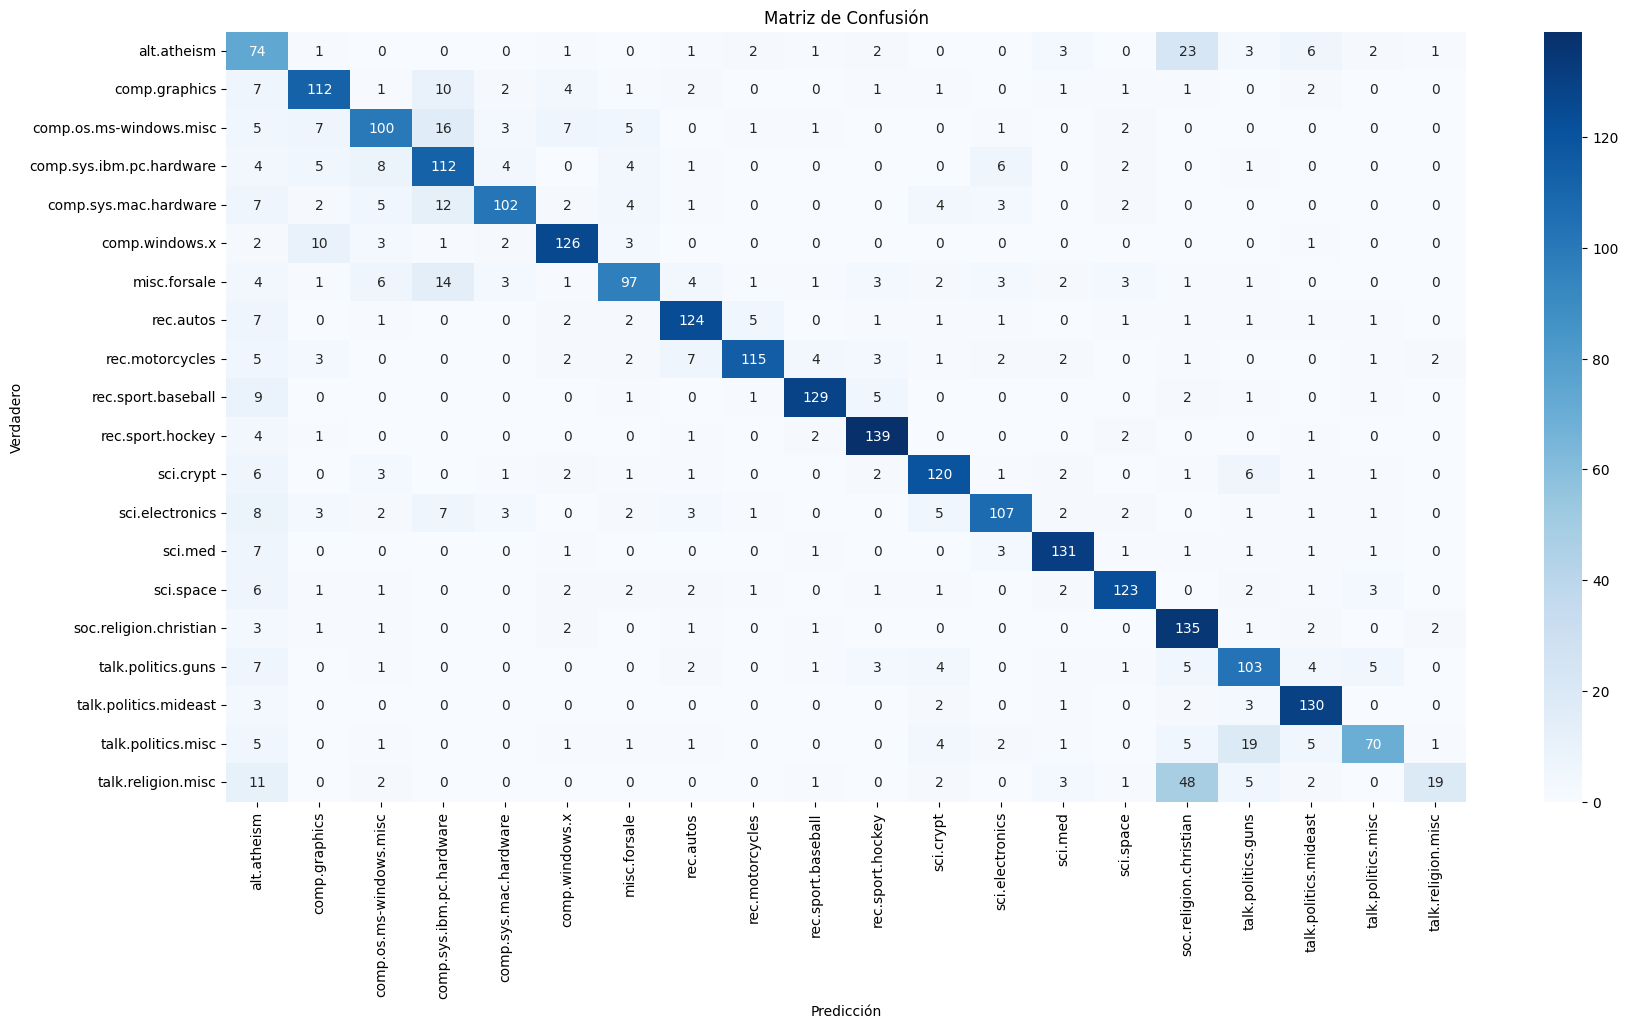

In [208]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels = newsgroups.target_names,
            yticklabels = newsgroups.target_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

Se observa que el modelo clasifica bastante bien.  
Los casos en que la predicción no es correcta, en su mayoría corresponden a categorías relacionadas.  
<br>
Por ejemplo:  
* Verdadero: talk.**religion**.misc / Predicción: soc.**religion**.christian  
* Verdadero: talk.**politics**.misc / Predicción: talk.**politics**.guns  
<br>
<br>
Si bien no corresponden exactamente a la misma etiqueta, los contenidos están relacionados al mismo eje temático.


## Similaridad entre términos

**Consigna 3)**   
  
Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.   
**La elección de palabras no debe ser al azar para evitar la aparición de términos poco interpretables, elegirlas "manualmente"**.


In [209]:
# Vectorizar con TF-IDF
TF_IDF_3 = TfidfVectorizer(stop_words='english', norm='l2')

# Matriz documento-término
newsgroups_vect_3 = TF_IDF_3.fit_transform(newsgroups.data)

In [210]:
# Matriz documento-término
newsgroups_vect_3.shape

(18846, 134101)

In [211]:
X_transposed = newsgroups_vect_3.T

# Matriz término-documento
X_transposed.shape

(134101, 18846)

#### Vocabulario

In [212]:
# Explorar vocabulario para seleccionar 5 términos manualmente
vocab = TF_IDF_3.vocabulary_

print(vocab)

{'sure': 113931, 'bashers': 29416, 'pens': 93336, 'fans': 52286, 'pretty': 96571, 'confused': 38965, 'lack': 73308, 'kind': 71631, 'posts': 95813, 'recent': 101186, 'massacre': 79103, 'devils': 44206, 'actually': 22942, 'bit': 30989, 'puzzled': 98019, 'relieved': 102029, 'going': 57968, 'end': 49321, 'non': 87611, 'pittsburghers': 94627, 'relief': 102024, 'praise': 96097, 'man': 78556, 'killing': 71591, 'worse': 128055, 'thought': 116912, 'jagr': 68455, 'just': 69968, 'showed': 108636, 'better': 30409, 'regular': 101780, 'season': 107238, 'stats': 112195, 'lot': 75880, 'fo': 54152, 'fun': 55396, 'watch': 126234, 'playoffs': 94931, 'bowman': 32124, 'let': 74388, 'couple': 40109, 'games': 56290, 'beat': 29793, 'pulp': 97803, 'jersey': 68851, 'disappointed': 44922, 'islanders': 67564, 'lose': 75863, 'final': 53378, 'game': 56276, 'rule': 104898, 'brother': 32727, 'market': 78911, 'high': 61685, 'performance': 93450, 'video': 124167, 'card': 34670, 'supports': 113874, 'vesa': 123948, 'loca

Palabras de interés seleccionadas arbitrariamente de forma manual para que los resultados sean interpretables:

In [213]:
# Palabras de interés
words = ['problem', 'death', 'magic', 'husband', 'short']

# Obtener índices de las palabras de interés en el vocabulario
word_indexes = {word: vocab[word] for word in words if word in vocab}

# Obtener vectores de representación de esos términos
word_vectors = {word: X_transposed[word_indexes[word]].toarray() for word in word_indexes}


#### Similitudes

In [214]:
# Inicializar un diccionario para almacenar las similitudes
word_similarities = {}
n = 5
results = []

# Calcular similitudes coseno
for word, vector in word_vectors.items():
    # Calcular la similitud coseno con todos los términos
    similarity_scores = cosine_similarity(vector, X_transposed)

    # Almacenar los resultados en el diccionario
    word_similarities[word] = similarity_scores.flatten()



# Mostrar las similitudes
for word, scores in word_similarities.items():

    # Obtener los índices de las n palabras más similares
    similar_indices = scores.argsort()[::-1][1:n+1]  # Excluir la propia palabra

    for index in similar_indices:

      results.append({
          'Palabra de referencia': word,
          'Palabra similar': TF_IDF_3.get_feature_names_out()[index],
          'Similitud (%)': f'{round(scores[index] * 100, 2)}'
      })


results_df = pd.DataFrame(results)

display(results_df.style.hide(axis='index'))

Palabra de referencia,Palabra similar,Similitud (%)
problem,fixed,15.98
problem,fix,15.73
problem,solve,13.83
problem,problems,13.83
problem,solved,13.07
death,penalty,28.6
death,recidivism,18.77
death,acknosledge,18.53
death,reallly,18.53
death,deterrent,17.26


#### Conclusiones

Al analizar la similaridad de las palabras seleccionadas utilizando la métrica de similitud coseno en el contexto de la vectorización TF-IDF, se observa que, si bien semánticamente algunos son similares, otros presentan cercanía pero no  tan significativa.  
Además, los indicadores de similitud son en general bajos.  
<br>
Esto podría deberse a varios factores:  
<br>
* Las palabras elegidas pueden no aparecer en contextos similares dentro del corpus. Este conjunto de datos abarca una amplia variedad de temas, por lo que, es probable que las palabras se utilicen en diferentes contextos, lo que limita su similitud.

* La representación TF-IDF pondera las palabras según su frecuencia en documentos, pero no necesariamente refleja relaciones semánticas. Palabras con baja coocurrencia en los mismos documentos o frases pueden tener representaciones vectoriales distintas, resultando en puntuaciones de similitud más bajas.

* El espacio de características generado por TF-IDF tiene alta dimensionalidad y es disperso, lo que puede dificultar la captura de relaciones significativas entre palabras. Esto significa que incluso términos que parecen estar relacionados pueden tener representaciones vectoriales distantes.

* Las palabras pueden tener múltiples significados o connotaciones dependiendo del contexto en el que se utilicen. Esto puede llevar a que términos que intuitivamente podrían parecer similares (por su significado) no lo sean en el análisis cuantitativo.  
<br>
En resumen, aunque algunas palabras puedan compartir un contexto general, las diferencias en su uso, significado y frecuencia dentro del corpus podrían estar afectando su representación vectorial, lo que resalta la complejidad del análisis de lenguaje natural y la necesidad de considerar el contexto y la coocurrencia al interpretar las relaciones entre términos.